# predicting model of slaking settlement¶
## import and definition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import math 
import numpy.polynomial.polynomial as poly
from scipy.interpolate import interp1d
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches
# calculating the brekage 
def relative_br (seive_size, percentage_passing):

    seive_log=np.log10(np.array(seive_size))
    seive_dis=np.array(seive_log)[:-1]-np.array(seive_log)[1:]
    per_dis_100_1cy=(np.array(percentage_passing)[:-1]+np.array(percentage_passing)[1:])/2
    total_100_1cy=((seive_dis)*per_dis_100_1cy).sum()
    seive_dis_init=(np.log10(np.array(seive_size)[0])-np.log10(np.array(seive_size)[1]))*50
    area_inbetween=total_100_1cy-seive_dis_init
    possible_total=(np.log10(np.array(seive_size)[0])-np.log10(np.array(seive_size)[-1]))*100-seive_dis_init
    Br=(area_inbetween/possible_total)
    return (Br)
# calculating the particle size with givein percentage
def parti_size (sei, pass_per, wan_per):
    return(np.interp(wan_per,list(reversed(list(pass_per))),list(reversed(list(sei)))))
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

# Data and its manipulation

In [5]:
df1= pd. read_excel (r"C:\Users\user\Desktop\python link\master research1.xlsx")#read the settlement related file
# df2= pd. read_excel (r"C:\Users\ThinkCentre-M73\Desktop\master 2\python link file\breakage.xlsx")#read the breakage related file
# df3= pd. read_excel (r"C:\Users\ThinkCentre-M73\Desktop\master 2\python link file\3 compaction strain.xlsx")# 3 compaction mudstone
df1.dropna(subset = ["100 kpa"], inplace=True)


# add columen for dry density (no suffi)
df1["Dry Density 100 kpa"]=1250*(100)/(100-df1["100 kpa"]-1)
df1["Dry Density 200 kpa"]=1250*(100)/(100-df1["200 kpa"]-2.2)
df1["Dry Density 500 kpa"]=1250*(100)/(100-df1["500 kpa"]-4)
# compaction 
# df3["Dry Density 82%"]=1314*(100)/(100-df3["s-82%"]-1.9)
# df3["Dry Density 87%"]=1394*(100)/(100-df3["s-87%"]-1.7)

# add columen for voids (no suffi)
df1["e-100 kpa"]=(1-(df1["Dry Density 100 kpa"]/2690))/(df1["Dry Density 100 kpa"]/2690)
df1["e-200 kpa"]=(1-(df1["Dry Density 200 kpa"]/2690))/(df1["Dry Density 200 kpa"]/2690)
df1["e-500 kpa"]=(1-(df1["Dry Density 500 kpa"]/2690))/(df1["Dry Density 500 kpa"]/2690)
# compaction 
# df3["e-82%"]=(1-(df3["Dry Density 82%"]/2690))/(df3["Dry Density 82%"]/2690)
# df3["e-87%"]=(1-(df3["Dry Density 87%"]/2690))/(df3["Dry Density 87%"]/2690)
# add columen for voids (suffi)
df1['e-100 kpa'][0]=1.14229
df1['e-200 kpa'][0]=1.105
df1['e-500 kpa'][0]=1.02
# add columen for relative compaction 
df1['dc-100']=df1['Dry Density 100 kpa']/1650*100
df1['dc-200']=df1['Dry Density 200 kpa']/1650*100
df1['dc-500']=df1['Dry Density 500 kpa']/1650*100


## rearranging the data only for dry

In [6]:
#only dry and not for first wetting 
#100
t0_100=np.array(df1['e-100 kpa'][::2])#e for dry 
t1_100=t0_100-np.ones(len(t0_100))*t0_100[-1]#differnce from nc line
t2_100=t0_100[:-1]-t0_100[1:]                # e reduction
# e_cum_100=np.cumsum(t1_100)# cumulative differnce from nc line
s_cum_100=np.array(df1["100 kpa"][::2])# cumulative dry strain
s1_100=-(s_cum_100[:-1]-s_cum_100[1:])[:]#strain by cycle
#200
t0_200=np.array(df1['e-200 kpa'][::2])#e
t1_200=t0_200-np.ones(len(t0_200))*t0_200[-1]#differnce from nc line
t2_200=t0_200[:-1]-t0_200[1:]
# e_cum_200=np.cumsum(t1_200)# cumulative differnce from nc line
s_cum_200=np.array(df1["200 kpa"][::2])# cumulative dry strain
s1_200=-(s_cum_200[:-1]-s_cum_200[1:])[:]
# #compaction 
# #82%
# t0_82=np.array(df3['e-82%'][::2])#e
# t1_82=t0_82-np.ones(len(t0_82))*t0_200[-1]#differnce from nc line
# t2_82=t0_82[:-1]-t0_82[1:]
# e_cum_82=np.cumsum(t1_82)# cumulative differnce from nc line
# s_cum_82=np.array(df3["s-82%"][::2])# cumulative dry strain
# s1_82=-(s_cum_82[:-1]-s_cum_82[1:])[:]
# #87%
# t0_87=np.array(df3['e-87%'][::2])#e
# t1_87=t0_82-np.ones(len(t0_87))*t0_200[-1]#differnce from nc line
# t2_87=t0_87[:-1]-t0_87[1:]
# e_cum_87=np.cumsum(t1_87)# cumulative differnce from nc line
# s_cum_87=np.array(df3["s-87%"][::2])# cumulative dry strain
# s1_87=-(s_cum_87[:-1]-s_cum_87[1:])[:]
#500
t0_500=np.array(df1['e-500 kpa'][::2])#e
t1_500=t0_500-np.ones(len(t0_500))*t0_500[-1]#differnce from nc line
t2_500=t0_500[:-1]-t0_500[1:]
# e_cum_500=np.cumsum(t1_500)# cumulative differnce from nc line
s_cum_500=np.array(df1["500 kpa"][::2])# cumulative dry strain
s1_500=-(s_cum_500[:-1]-s_cum_500[1:])[:]

In [7]:
# plt.figure()

# # plt.plot(df1['no of cycle'],df1["100 kpa"][:],'o:r',label='100 kpa Mas')
# # plt.plot(df1['no of cycle'],df1["200 kpa"][:],'o:b',label='200 kpa Mas')
# # plt.plot(df1['no of cycle'],df1["500 kpa"][:],'o:g','go',label='500 kpa Mas')

# # compaction
# plt.plot(df1['no of cycle'][:7:2],df1["200 kpa"][:7][:7:2],'o:b',label='Dc 82%')
# plt.plot(df3['no of cycle'][::2],df3["s-82%"][::2],'o:c',label='Dc 82%')
# plt.plot(df3['no of cycle'][::2],df3["s-87%"][::2],'o:m',label='Dc 87%')

# plt.xlabel('Dry/Wet cycle')
# plt.ylabel('Vertical strain(%)')
# plt.legend(loc='best',framealpha=0.25,ncol=2)
# plt.xlim(0,4)
# plt.ylim(0,30)
# plt.grid(True)
# plt.show()


In [48]:
# # breakage of 3 points
# Br_100=[relative_br(df2['seive'],df2['100-1cy']),relative_br(df2['seive'],df2['100-5cy']),relative_br(df2['seive'],df2['100-9cy'])]
# Br_200=[relative_br(df2['seive'],df2['200-1cy']),relative_br(df2['seive'],df2['200-5cy']),relative_br(df2['seive'],df2['200-9cy'])]
# Br_500=[relative_br(df2['seive'],df2['500-1cy']),relative_br(df2['seive'],df2['500-5cy']),relative_br(df2['seive'],df2['500-9cy'])]
# # strain of those point
# #strain_100=[(df1.loc[df1['no of cycle']==1, '100 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '100 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '100 kpa'].iloc[0])]
# #strain_200=[(df1.loc[df1['no of cycle']==1, '200 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '200 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '200 kpa'].iloc[0])]
# #strain_500=[(df1.loc[df1['no of cycle']==1, '500 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '500 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '500 kpa'].iloc[0])]
# # cumulative e
# e_cum_100_159=[e_cum_100[1],e_cum_100[5],e_cum_100[9]]
# e_cum_200_159=[e_cum_200[1],e_cum_200[5],e_cum_200[9]]
# e_cum_500_159=[e_cum_500[1],e_cum_500[5],e_cum_500[9]]

In [12]:

t1_100[:-1]



array([0.3029756, 0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576,
       0.0049496, 0.0017216, 0.0006456])

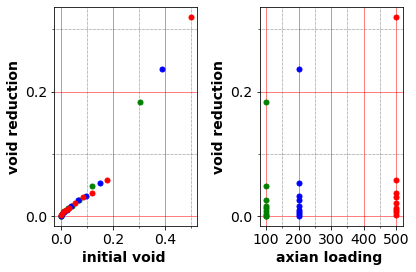

In [23]:
plt.rcParams.update({'font.size': 14})




#########################
fig5,(ax5e,ax5d)=plt.subplots(1,2)
# breakage of particle 
ax5d.plot(np.ones(len(t1_100[:-1]))*100,t2_100, color='green', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 100')
ax5d.plot(np.ones(len(t1_200[:-1]))*200,t2_200,color='b', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 200')
ax5d.plot(np.ones(len(t1_500[:-1]))*500,t2_500,color='r', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 500')
# ax5d.legend(loc='upper left',framealpha=0.25)
ax5d.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5d.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5d.set_ylabel('void reduction',fontweight='bold')
ax5d.set_xlabel('axian loading ',fontweight='bold')
# ax5d.set_ylim(-0.1,1)
ax5d.xaxis.set_major_locator(MultipleLocator(100))
ax5d.xaxis.set_minor_locator(MultipleLocator(50))
ax5d.yaxis.set_major_locator(MultipleLocator(0.2))
ax5d.yaxis.set_minor_locator(MultipleLocator(0.1))
# cumulative of voids 
ax5e.plot(t1_100[:-1],t2_100, color='green', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 100')
ax5e.plot(t1_200[:-1],t2_200,color='b', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 200')
ax5e.plot(t1_500[:-1],t2_500, color='r', marker="o", linestyle='-',linewidth=0, markersize=5, label='Erod 500')
# ax5e.plot(t1_82[:-1],t2_82, color='c', marker="o", linestyle='-',linewidth=0, markersize=5, label='Dc 82%')
# ax5e.plot(t1_87[:-1],t2_87, color='m', marker="o", linestyle='-',linewidth=0, markersize=5, label='Dc 87%')
# ax5e.legend(loc='upper left',framealpha=0.25)
ax5e.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5e.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5e.set_ylabel('void reduction',fontweight='bold')
ax5e.set_xlabel('initial void ',fontweight='bold')
ax5e.xaxis.set_major_locator(MultipleLocator(0.2))
ax5e.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5e.yaxis.set_major_locator(MultipleLocator(0.2))
ax5e.yaxis.set_minor_locator(MultipleLocator(0.1))

# voids vs cycle
# e_cy_100= e_cum_100[:-1]-e_cum_100[1:]
# e_cy_200= e_cum_200[:-1]-e_cum_200[1:]
# e_cy_1500= e_cum_500[:-1]-e_cum_500[1:]


fig5.tight_layout()
plt.show()


In [56]:
zdata

In [57]:
zdata = [].append(a[i][1] for i in range(len(t2_100)))

In [49]:
a=[]
for i in range(len(t2_100)):
    a.append(np.hstack([t1_100[:-1][i],l_100[i],t2_100[i]]))
    
    

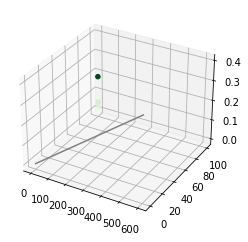

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 0.4, 5)
xline = np.linspace(0, 600, 5)
yline = np.linspace(0, 0.3, 5)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata=[]
ydata=[]
xdata=[]
for i in range(len(t2_100)):
    xdata.append(a[i][0])
    ydata.append(a[i][1])
    zdata.append(a[i][2])



ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [149]:
from scipy.optimize import curve_fit
def objective(x, a, b, c,d,e):
	return (a * x**3) + (b * x**4) + c*x**2 + d*x + e
popt,_ = curve_fit(objective,(voids, voids_reduction)

SyntaxError: unexpected EOF while parsing (<ipython-input-149-81009808274a>, line 4)

In [143]:
from scipy.optimize import curve_fit
def objective(x, a, b, c,d,e):
	return (a * x**3) + (b * x**4) + c*x**2 + d*x + e
popt,_ = curve_fit(objective,(voids, voids_reduction)
a, b, c,d,e = popt 
# three particle curve fitting 
min_x3, max_x3 = min(voids), max(voids)  
new_x3 = np.linspace(min_x3,max_x3,20)
new_y3=objective(new_x3, a3, b3, c3,d3,e3)
# ax4.plot(new_x3,new_y3,color='black', marker='o', linestyle='-',linewidth=2, markersize=0, label='Dense-3par')

SyntaxError: invalid syntax (<ipython-input-143-7399a761630f>, line 5)

In [147]:
voids=np.concatenate([t1_100[:-1],t1_200[:-1],t1_500[:-1]])
voids_reduction=np.concatenate([t2_100,t2_200,t2_500])
                      

In [148]:
voids

array([0.3029756, 0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576,
       0.0049496, 0.0017216, 0.0006456, 0.38878  , 0.151716 , 0.097916 ,
       0.065636 , 0.038736 , 0.022596 , 0.011836 , 0.00538  , 0.001076 ,
       0.498536 , 0.178616 , 0.120512 , 0.083928 , 0.0538   , 0.03228  ,
       0.019368 , 0.008608 , 0.002152 ])

# relative voids from NC line

In [73]:
# r_e_100= -(t0_100[1:]-t0_100[:-1])[1:]/((t1_100[1:-1])**1.2)
# r_e_200= -(t0_200[1:]-t0_200[:-1])[1:2]/((t1_200[1:-3])**1.2)
# r_e_500= -(t0_500[1:]-t0_500[:-1])[1:]/((t1_500[1:-1])**1.2) 

r_e_100= -(t0_100[:]-t0_100[:-1])[1:]
r_e_200= -(t0_200[1:]-t0_200[:-1])[1:]
r_e_500= -(t0_500[1:]-t0_500[:-1])[1:]

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

# gekko moldel 
## import/data setting 


In [30]:
from gekko import GEKKO
e_in=np.concatenate([np.ones(len(e_cum_100[0:-1]))*e_cum_100[0],np.ones(len(e_cum_500[0:-1]))*e_cum_500[0]])#e for collopse (after loading )
L_in=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100,np.ones(len(e_cum_500[0:-1]))*500])/1000
L_cy=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100,np.ones(len(e_cum_500[0:-1]))*500])/1000
e_cy=np.concatenate([e_cum_100[0:-1]-e_cum_100[0],e_cum_500[0:-1]-e_cum_500[0]])
s_t_cy=np.concatenate([s_cum_100[1:],s_cum_500[1:]])

NameError: name 'e_cum_100' is not defined

In [29]:
L_in

NameError: name 'L_in' is not defined

L_in_cy=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100],[np.ones(len(e_cum_200[0:-1]))*200],[np.ones(len(e_cum_500[0:-1]))*500])
e_cy=np.concatenate([e_cum_100[0:-1]-e_cum_100[0],e_cum_200[0:-1]-e_cum_200[0],e_cum_500[0:-1]-e_cum_500[0]])
s_t_cy=np.concatenate([s_cum_100[1:],s_cum_200[1:],s_cum_500[1:]])

## define the variable 

In [75]:
cof_load=np.concatenate([np.ones(len(t1_100[:-1]))*100,np.ones(len(t1_500[:-1]))*500])
cof_e=np.concatenate([t1_100[:-1],t1_500[:-1]])
cof_strain=np.concatenate([s1_100[:], s1_500[:]])
cof_e[0]=0
cof_e[9]=0


cof_e_in=np.zeros(len(cof_e))
cof_e_in[0]=e_in[0]
cof_e_in[9]=e_in[9]


In [76]:
xm1 = np.array(cof_e) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(L_cy)  # load commmon
xm3 = np.array(e_in) # collapase voids
xm4= np.array(L_in) 
 
ym = np.array(s_t_cy)

xm1

# only cycle predition

In [103]:
cof_load_cy=np.concatenate([np.ones(len(t1_100[1:-1]))*100,np.ones(len(t1_500[1:-1]))*500])
index = [0, 9]
cof_e_in=[e_cum_100[0],e_cum_500[0]]
cof_load_in=[100,500]
cof_strain_in=[s_t_cy[0],s_t_cy[9]]
cof_e_cy = np.delete(cof_e, index)
cof_strain_cy=np.delete(cof_strain,index)

In [104]:
cof_e_cy,cof_load_cy,cof_strain_cy

(array([0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576, 0.0049496,
        0.0017216, 0.0006456, 0.178616 , 0.120512 , 0.083928 , 0.0538   ,
        0.03228  , 0.019368 , 0.008608 , 0.002152 ]),
 array([100., 100., 100., 100., 100., 100., 100., 100., 500., 500., 500.,
        500., 500., 500., 500., 500.]),
 array([2.25, 1.25, 0.8 , 0.6 , 0.4 , 0.15, 0.05, 0.03, 2.7 , 1.7 , 1.4 ,
        1.  , 0.6 , 0.5 , 0.3 , 0.1 ]))

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  7
   Intermediates:  0
   Connections  :  0
   Equations    :  2
   Residuals    :  2
 
 Number of state variables:    19
 Number of total equations: -  16
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    3
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.49020E+04  1.38987E-01
    1  7.56134E+05  5.55112E-17
    2  5.87836E+04  1.23797E-01
    3  1.18447E+02  2.40490E-01
    4  7.91053E+00  4.20294E-04
    5  7.72071E+00  3.59126E-05
    6  7.44391E+00  7.08561E-04
    7  7.35818E+00

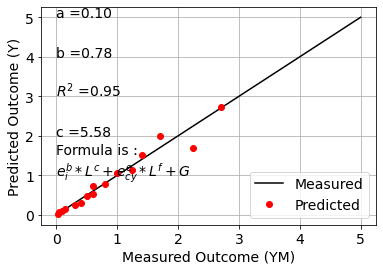

In [105]:
xm1 = np.array(cof_load_cy) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(cof_e_cy)
ym3 = np.array(cof_strain_cy)

m3 = GEKKO(remote=False)

a = m3.FV(lb=0.1,ub=100.0)
b = m3.FV(lb=0.1,ub=100.0)
c = m3.FV(lb=0.1,ub=100.0)


x1 = m3.Param(value=xm1)
x2 = m3.Param(value=xm2)

z3 = m3.Param(value=ym3)
y3 = m3.Var()
m3.Equation(y3==c*(x1**a)*(x2**b))
m3.Minimize(((y3-z3)/z3)**2)
# Options

a.STATUS = 1
b.STATUS = 1
c.STATUS = 1


m3.options.IMODE = 2
m3.options.SOLVER = 1
# Solve
m3.solve(disp=True)

print('a: ', a.value[0])
print('b: ', b.value[0])
print('c: ', c.value[0])


# print('A: ', A.value[0])

##################################################################################################
cFormula = "Formula is : " + "\n" + \
           r"$e_i^b*L^c + e_{cy}^e*L^f + G $"

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(ym3,y3)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
# print(cR2)

# plot solution
plt.figure(1)
plt.plot([0,5],[0,5],'k-',label='Measured')
plt.plot(ym3,y3,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

plt.text(0,5,'a =' + "{:.2f}".format(a.value[0])) 
plt.text(0,4,'b =' + "{:.2f}".format(b.value[0])) 
plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(0,3,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"
cy_pre=y3


In [106]:
cof_load_in,cof_e_in,cof_strain_in

([100, 500], [0.3029756, 0.498536], [8.0, 17.0])

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  6
   Intermediates:  0
   Connections  :  0
   Equations    :  2
   Residuals    :  2
 
 Number of state variables:    4
 Number of total equations: -  2
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    2
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.83629E+00  2.17058E-01
    1  1.46719E+00  2.07925E-01
    2  2.99058E-01  5.05553E-02
    3  1.44645E-01  1.14091E-01
    4  6.29961E-01  3.11269E-02
    5  4.94111E-03  3.26364E-02
    6  5.84100E-03  3.07247E-02
    7  1.43054E-03  

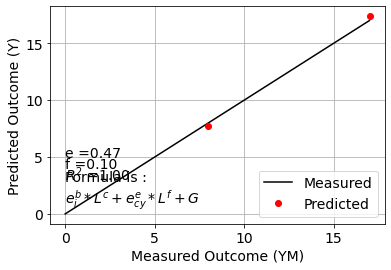

In [107]:

xm1 = np.array(cof_load_in) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(cof_e_in)
ym4 = np.array(cof_strain_in)

m4 = GEKKO(remote=False)

e = m4.FV(lb=0.1,ub=100.0)
f = m4.FV(lb=0.1,ub=100.0)
# c = m3.FV(lb=0.1,ub=100.0)


x1 = m4.Param(value=xm1)
x2 = m4.Param(value=xm2)

z4 = m4.Param(value=ym4)
y4 = m4.Var()
m4.Equation(y4==(x1**e)*(x2**f))
m4.Minimize(((y4-z4)/z4)**2)
# Options

e.STATUS = 1
f.STATUS = 1
# c.STATUS = 1


m4.options.IMODE = 2
m4.options.SOLVER = 1
# Solve
m4.solve(disp=True)

print('e: ', e.value[0])
print('f: ', f.value[0])
# print('c: ', c.value[0])


# print('A: ', A.value[0])

##################################################################################################
cFormula = "Formula is : " + "\n" + \
           r"$e_i^b*L^c + e_{cy}^e*L^f + G $"

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(ym4,y4)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([0,17],[0,17],'k-',label='Measured')
plt.plot(ym4,y4,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

plt.text(0,5,'e =' + "{:.2f}".format(e.value[0])) 
plt.text(0,4,'f =' + "{:.2f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(0,3,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"

In [108]:
pre_100=cy_pre[0:8]

pre_500=cy_pre[8:16]
pre_100.insert(0,y4[0])

pre_500.insert(0,y4[1])


In [109]:
pre_100

[7.7502430102,
 1.6883557699,
 1.1246466978,
 0.77434976449,
 0.52443557563,
 0.31166446288,
 0.14233328706,
 0.062599671132,
 0.029190940255]

In [110]:
s_cum_100[1:]


array([ 8.  , 10.25, 11.5 , 12.3 , 12.9 , 13.3 , 13.45, 13.5 , 13.53])

In [85]:
zzz

NameError: name 'zzz' is not defined

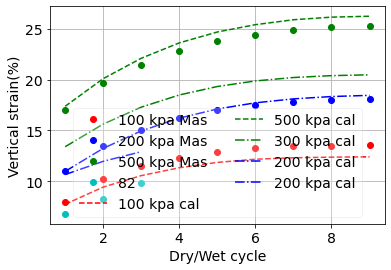

R^2 correlation = 0.9970948696461154


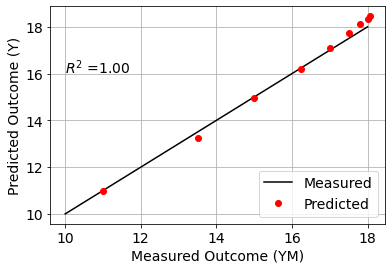

'$D * Voids^E * Load^f + G$'

In [116]:
plt.figure()

plt.plot(np.linspace(1, 9,9),s_cum_100[1:],'ro',label='100 kpa Mas')
plt.plot(np.linspace(1, 9,9),s_cum_200[1:],'bo',label='200 kpa Mas')
plt.plot(np.linspace(1, 9,9),s_cum_500[1:],'go',label='500 kpa Mas')
plt.plot(np.linspace(1, 3,3),s_cum_87[1:],'co',label='82')
plt.plot(np.linspace(1, 9,9),np.cumsum(pre_100),'r--',label='100 kpa cal')
#plt.plot(np.linspace(1, 9,9),np.cumsum(pre_200),'b--',label='200 kpa cal')
plt.plot(np.linspace(1, 9,9),np.cumsum(pre_500),'g--',label='500 kpa cal')
plt.plot(np.linspace(1, 9,9),pre_strain(in_e_300,nc_e_300, 9, 300),'g-.',label='300 kpa cal')
plt.plot(np.linspace(1, 9,9),pre_strain(in_e_200,nc_e_200, 9, 200),'b-.',label='200 kpa cal')
plt.plot(np.linspace(1, 3,3),pre_strain(in_e_82,nc_e_82, 3, 200),'b-.',label='200 kpa cal')
pre_strain(in_e_300,nc_e_300, 9, 300)
plt.xlabel('Dry/Wet cycle')
plt.ylabel('Vertical strain(%)')
plt.legend(loc='best',framealpha=0.25,ncol=2)

plt.grid(True)
plt.show()

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200))

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([10,18],[10,18],'k-',label='Measured')
plt.plot(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200),'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

# plt.text(0,5,'e =' + "{:.2f}".format(e.value[0])) 
# plt.text(0,4,'f =' + "{:.2f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(10,16,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
# plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
# cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"

# prediction of 300 kpa

In [87]:
(s_cum_200[1:]),np.array(pre_strain(in_e_200,nc_e_200, 9, 200)),r_value

(array([11.  , 13.5 , 15.  , 16.25, 17.  , 17.5 , 17.8 , 18.  , 18.05]),
 array([10.66683115, 11.96796393, 12.91382583, 13.57579312, 14.01671894,
        14.29121552, 14.44594379, 14.51990741, 14.54472469]),
 0.9996568769892696)

R^2 correlation = 0.9993138717119397


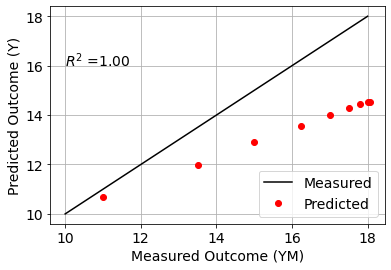

'$D * Voids^E * Load^f + G$'

In [88]:
from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200))

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([10,18],[10,18],'k-',label='Measured')
plt.plot(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200),'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

# plt.text(0,5,'e =' + "{:.2f}".format(e.value[0])) 
# plt.text(0,4,'f =' + "{:.2f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(10,16,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
# plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
# cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"

In [97]:
df4=pd.read_excel(r"C:\Users\ThinkCentre-M73\Desktop\master 2\python link file\voids vs load.xlsx")
in_e_300=np.interp(300,df4["loading"],df4["voids-load"])
nc_e_300=np.interp(300,[200,500],[t0_200[-1],t0_500[-1]])
no_cycle=9
load=300

In [99]:
in_e_200=np.interp(200,df4["loading"],df4["voids-load"])
nc_e_200=0.7162
no_cycle=9
load=200

In [100]:
in_e_82=df3['e-82%'][0]
nc_e_82=0.7162
no_cycle=3
load=200

In [115]:
in_e_82,in_e_200

(1.0082876712328768, 1.1057963871128824)

In [102]:
def pre_strain (in_e,nc_e,no_cycle,load):
    strain_pre=[]
    
    # initial strain
    str_in=load**0.47*(in_e-nc_e)**0.1
    strain_pre.insert(0,str_in)
    ini1=[]
    ini=in_e*(1-((str_in)/100))-(str_in)/100
    for i in range(no_cycle-1):
        strain_pre.append(strain_pre[i]+5.61*load**0.1*(ini-nc_e)**0.78)
        ini=in_e*(1-((strain_pre[i+1])/100))-(strain_pre[i+1])/100
        ini1.append(in_e*(1-(strain_pre[i+1])/97)-(strain_pre[i+1])/97)
    return strain_pre
        
        
    


In [66]:
e_cum_87

array([0.29206767, 0.42036061, 0.50770986, 0.56844572])

In [64]:
pre_strain(in_e_300,nc_e_300, 9, 300)

[13.401325030648058,
 15.628787213506534,
 17.28868164258405,
 18.487238840716067,
 19.318845016535125,
 19.866416040113617,
 20.201781719586105,
 20.386079799022347,
 20.470153736258087]

In [757]:
pre_strain(in_e_200,nc_e_200, 9, 200)

[9.550003401525537,
 11.39681583861104,
 12.76429824238251,
 13.741724572258477,
 14.409114288919849,
 14.837393893532422,
 15.088560265145636,
 15.215840743071917,
 15.263817474909589]

In [921]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(pre_strain(in_e_200,nc_e_200, 9, 200),s_cum_200[1:]) 

In [922]:
coefficient_of_dermination

0.9908735083555548